In [1]:
from keras.models import Sequential, Model, load_model, model_from_json
from keras import layers
from keras.layers import Input
import keras
from keras.datasets import cifar10
from keras import regularizers, callbacks
import sys
sys.path.append('C:/Users/320060820/experiments/')
from train_model import *
from inception_model import get_model
import copy

import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [22]:
# TRAIN = True
save_path = '../model archive/test/'
num_classes = 10
epochs = 50
reduced_training_size_factor = 1
batch_size = 32
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 25500.
x_test /= 25500.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
             optimizer = opt,
             metrics=['accuracy'])

# (x_train_resize, y_train), (x_test_resize, y_test) = convert_data(train_data, test_data, 
#                                                                   batch_size, num_classes, 
#                                                                   reduced_training_size_factor,
#                                                                  input_channels=3)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [5]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True, 
                    validation_data=(x_test, y_test))
# model.save(save_path + 'keras_cifar10_example_dense_rmsprop_batchnorm.h5')

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 521us/step - loss: 1.8585 - acc: 0.3692 - val_loss: 1.4309 - val_acc: 0.5022
Epoch 2/50
50000/50000 [==============================] - 25s 495us/step - loss: 1.4354 - acc: 0.4963 - val_loss: 1.3408 - val_acc: 0.5600
Epoch 3/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.2737 - acc: 0.5603 - val_loss: 1.1712 - val_acc: 0.6005
Epoch 4/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.1621 - acc: 0.5971 - val_loss: 1.0421 - val_acc: 0.6467
Epoch 5/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.0804 - acc: 0.6282 - val_loss: 1.0234 - val_acc: 0.6544
Epoch 6/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.0191 - acc: 0.6491 - val_loss: 0.9185 - val_acc: 0.6861
Epoch 7/50
50000/50000 [==============================] - 24s 488us/

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.5970991486787796
Test accuracy 0.8122


## Replace Dense layers with Max pooling layer

In [25]:
pmodel = Sequential()
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

pmodel.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

# pmodel.add(layers.Flatten())
pmodel.add(layers.GlobalMaxPooling2D())
pmodel.add(layers.Dropout(0.25))
pmodel.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001)

pmodel.compile(loss='categorical_crossentropy',
             optimizer = opt,
             metrics=['accuracy'])

In [4]:
pmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [26]:
epochs = 70
history = pmodel.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True, 
                    validation_data=(x_test, y_test))
# pmodel.save(save_path + 'keras_cifar10_example_pool_rmsprop_batchnorm.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 21s 414us/step - loss: 3.2269 - acc: 0.1974 - val_loss: 1.8132 - val_acc: 0.3351
Epoch 2/70
50000/50000 [==============================] - 20s 400us/step - loss: 2.1700 - acc: 0.2617 - val_loss: 1.7403 - val_acc: 0.3872ss: 2.1711 - acc: 0.
Epoch 3/70
50000/50000 [==============================] - 20s 400us/step - loss: 1.9442 - acc: 0.3107 - val_loss: 1.8437 - val_acc: 0.3448
Epoch 4/70
50000/50000 [==============================] - 20s 400us/step - loss: 1.7938 - acc: 0.3581 - val_loss: 4.6717 - val_acc: 0.1776
Epoch 5/70
50000/50000 [==============================] - 20s 400us/step - loss: 1.6938 - acc: 0.3917 - val_loss: 3.5966 - val_acc: 0.1399
Epoch 6/70
50000/50000 [==============================] - 20s 400us/step - loss: 1.6032 - acc: 0.4244 - val_loss: 2.0850 - val_acc: 0.3195
Epoch 7/70
50000/50000 [==============================] - 20s 400us/step - loss: 1.5484 - acc: 0

KeyboardInterrupt: 

In [12]:
def get_model_weights(model):
    """
    Get all coefficients of the convolutional kernels
    """
    weights_list = []
    biases_list = []
    for layer in model.layers:
        if layer.weights and 'kernel' in layer.weights[0].name:
            w = layer.get_weights()[0].flatten()
            b = layer.get_weights()[1].flatten()
            weights_list.append(w)
            biases_list.append(b)
    
    weights_arr = np.concatenate(weights_list)
    biases_arr = np.concatenate(biases_list)

    return weights_arr, biases_arr

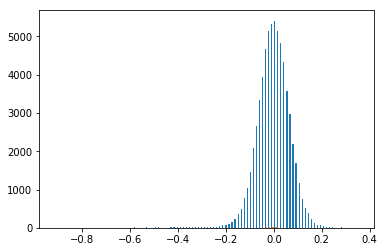

In [16]:
a = get_model_weights(pmodel)
plt.hist(a, bins=100);

model saved